# Final Project



### Importing Libraries



In [1]:
import pandas as pd
import numpy as np
import geopy.distance
#from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from skimage.io import imread
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing, linear_model
import warnings
import statsmodels.api as sma

### Defining some methods



In [2]:
# Calculates the distance in miles between two coordinates.
def dist_calc(user_lat, user_long, tar_lat, tar_long):
    coords_1 = (user_lat, user_long)
    coords_2 = (tar_lat, tar_long)
    return geopy.distance.geodesic(coords_1, coords_2).mi

# Iterates through each row, sets distance from recommendee coordinates to restaurant.
def set_dist(user_lat, user_long):
    for i in range(len(df)):
        lat = df.iloc[i]['latitude']
        long = df.iloc[i]['longitude']
        df.at[i,'Distance (Miles)'] = round(dist_calc(user_lat, user_long, lat, long), 2)

# Ignoring a few depreciation warnings here.
warnings.filterwarnings('ignore')

## Data Understanding



In [3]:
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df

business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1       87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                  5255 E Broadway Blvd         Tucson    AZ       85711   
3                           935 Race St   Philadelphia    PA       19107   
4                         101 Walnut St     Green Lane    PA       18054   
...                                 ...            ...   ...         ...   
150341                3388 Gateway Blvd       Edmonton    AB     T6J 5H2   
150342               2813 Bransford Ave      Nashville    TN       37204   
150343           6020 E 82nd St, Ste 46   Indianapolis    IN       46250   
150344                     2472 Troy Rd   Edwardsville    IL       62025   
150345            238 Apollo Beach Blvd   Apollo beach    FL       33572   

         latitude   longitude  stars  review_count  is_open  \
0       34.426679 -119.711197    5.0             7        0   
1       38.551126  -90.335695    3.0            15        1   
2       32.223236 -110.880452    3.5            22        0   
3       39.955505  -75.155564    4.0            80        1   
4       40.338183  -75.471659    4.5            13        1   
...           ...         ...    ...           ...      ...   
150341  53.468419 -113.492054    3.0            13        1   
150342  36.115118  -86.766925    4.0             5        1   
150343  39.908707  -86.065088    3.5             8        1   
150344  38.782351  -89.950558    4.0            24        1   
150345  27.771002  -82.394910    4.5             9        1   

                                               attributes  \
0                           {'ByAppointmentOnly': 'True'}   
1                  {'BusinessAcceptsCreditCards': 'True'}   
2       {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3       {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4       {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   
...                                                   ...   
150341  {'ByAppointmentOnly': 'False', 'RestaurantsPri...   
150342  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
150343  {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
150344  {'BusinessParking': '{'garage': False, 'street...   
150345  {'WheelchairAccessible': 'True', 'BusinessAcce...   

                                               categories  \
0       Doctors, Traditional Chinese Medicine, Naturop...   
1       Shipping Centers, Local Services, Notaries, Ma...   
2       Department Stores, Shopping, Fashion, Home & G...   
3       Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                               Brewpubs, Breweries, Food   
...                                                   ...   
150341                         Nail Salons, Beauty & Spas   
150342  Pets, Nurseries & Gardening, Pet Stores, Hobby...   
150343  Shopping, Jewelry, Piercing, Toy Stores, Beaut...   
150344  Fitness/Exercise Equipment, Eyewear & Optician...   
150345  Beauty & Spas, Permanent Makeup, Piercing, Tattoo   

                                                    hours  
0                                                    None  
1       {'Monday': '0:0-0:0', 'Tuesday': '

In [4]:
df = df[(df['categories'].str.contains('Restaurants', case=False, na=False))]
df = df[df['city'] == 'Philadelphia']
df.drop(['address', 'city', 'postal_code', 'business_id', 'state', 'is_open', 'hours', 'attributes'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

name   latitude  longitude  stars  review_count  \
0  St Honore Pastries  39.955505 -75.155564    4.0            80   
1            Tuna Bar  39.953949 -75.143226    4.0           245   
2                 BAP  39.943223 -75.162568    4.5           205   
3             Bar One  39.939825 -75.157447    4.0            65   
4    DeSandro on Main  40.022466 -75.218314    3.0            41   

                                          categories  
0  Restaurants, Food, Bubble Tea, Coffee & Tea, B...  
1                  Sushi Bars, Restaurants, Japanese  
2                                Korean, Restaurants  
3  Cocktail Bars, Bars, Italian, Nightlife, Resta...  
4                    Pizza, Restaurants, Salad, Soup

In [5]:
# We can set these to any coordinate in the Philidelphia area, can generate a randomizer if we would like to.
user_lat = 39.9498
user_long = -75.1999
set_dist(user_lat, user_long)

df.head()

name   latitude  longitude  stars  review_count  \
0  St Honore Pastries  39.955505 -75.155564    4.0            80   
1            Tuna Bar  39.953949 -75.143226    4.0           245   
2                 BAP  39.943223 -75.162568    4.5           205   
3             Bar One  39.939825 -75.157447    4.0            65   
4    DeSandro on Main  40.022466 -75.218314    3.0            41   

                                          categories  Distance (Miles)  
0  Restaurants, Food, Bubble Tea, Coffee & Tea, B...              2.39  
1                  Sushi Bars, Restaurants, Japanese              3.02  
2                                Korean, Restaurants              2.03  
3  Cocktail Bars, Bars, Italian, Nightlife, Resta...              2.36  
4                    Pizza, Restaurants, Salad, Soup              5.11

# Data Visualizations



Text(0, 0.5, 'Counts')

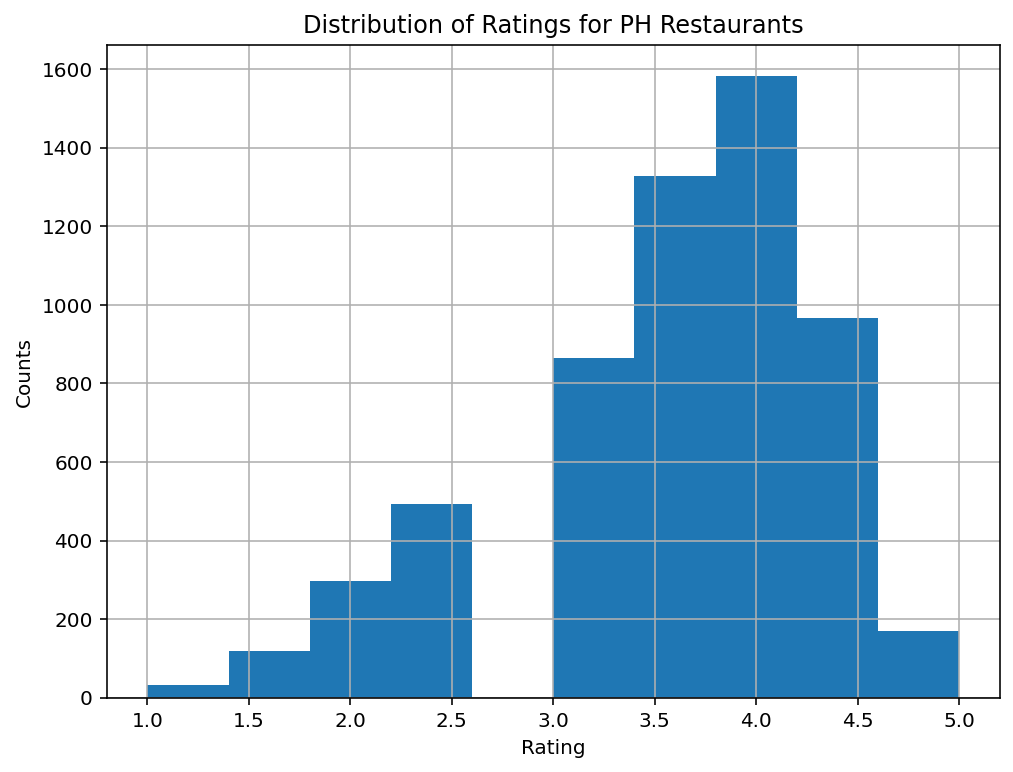

In [6]:
# Distribution of ratings for PH restaurants
fig, ax = plt.subplots(figsize=(8,6))
df['stars'].hist(ax=ax)
ax.set_title('Distribution of Ratings for PH Restaurants')
ax.set_xlabel('Rating')
ax.set_ylabel('Counts')

In [7]:
#way to sort by rating & review_count and have the resturant name in a specific category
df_temp = df[df['categories'].str.contains(
          'mexican', case=False, na=False)].sort_values(by=['stars', "review_count"],
           ascending=[False, False])
df_temp

name   latitude  longitude  stars  \
2719                Tortilleria San Roman  39.937636 -75.158082    5.0   
3103                      El Rancho Viejo  39.936282 -75.152142    5.0   
5468                            El Bocado  39.936367 -75.155403    5.0   
1282                         Alma Del Mar  39.937310 -75.158010    5.0   
4464  Chiquita's Pizzeria & Mexican Grill  39.922904 -75.159634    5.0   
...                                   ...        ...        ...    ...   
4844               Chipotle Mexican Grill  39.979440 -75.153625    1.5   
2546                            Taco Bell  40.042330 -75.144600    1.5   
2839                            Taco Bell  39.922100 -75.187260    1.0   
2338                            Taco Bell  39.999570 -75.153480    1.0   
4514                             Chipotle  39.923491 -75.140583    1.0   

      review_count                                         categories  \
2719           219  Convenience Stores, Italian, Specialty Food, M...   
3103           110                               Restaurants, Mexican   
5468           104  Restaurants, Mexican, Latin American, Salvador...   
1282            80  Coffee & Tea, Seafood, Restaurants, Fish & Chi...   
4464            48               Mexican, Pizza, Restaurants, Italian   
...            ...                                                ...   
4844             9                    Restaurants, Fast Food, Mexican   
2546             7    Restaurants, Fast Food, Mexican, Tex-Mex, Tacos   
2839            17    Fast Food, Tex-Mex, Tacos, Restaurants, Mexican   
2338            12    Restaurants, Tex-Mex, Mexican, Fast Food, Tacos   
4514             8                    Fast Food, Restaurants, Mexican   

      Distance (Miles)  
2719              2.37  
3103              2.70  
5468              2.54  
1282              2.39  
4464              2.83  
...                ...  
4844              3.20  
2546              7.03  
2839              2.03  
2338              4.23  
4514              3.64  

[316 rows x 7 columns]

In [8]:
df_temp = df[df['categories'].str.contains(
    'chinese', case=False, na=False)].sort_values(by=['stars', "review_count"],
               ascending=[False, False])
df_temp

name   latitude  longitude  stars  review_count  \
1654  Far East Chinese Cuisine  40.019695 -75.174272    5.0            28   
2640             House of Chen  39.955173 -75.155511    5.0            10   
920              Peking Garden  39.986448 -75.155695    5.0             9   
2468              Paradise Inn  39.974099 -75.181294    5.0             8   
5683              Lian Hsing's  39.933479 -75.172133    5.0             8   
...                        ...        ...        ...    ...           ...   
948                 Asian Chao  39.876143 -75.242886    1.5            24   
3320              Fresh Garden  40.043849 -75.053659    1.5            20   
811              Beijing Panda  40.003400 -75.206788    1.5            13   
2417                   Pei Wei  39.952141 -75.158537    1.5            10   
2870         Grand King Buffet  39.920702 -75.146513    1.5             9   

                                             categories  Distance (Miles)  
1654                    Cantonese, Chinese, Restaurants              5.01  
2640                               Restaurants, Chinese              2.39  
920        American (Traditional), Chinese, Restaurants              3.45  
2468                               Chinese, Restaurants              1.95  
5683  Restaurants, American (Traditional), Seafood, ...              1.86  
...                                                 ...               ...  
948               Food, Restaurants, Fast Food, Chinese              5.57  
3320  Japanese, Asian Fusion, Sushi Bars, Restaurant...             10.12  
811                                Chinese, Restaurants              3.72  
2417  Restaurants, Chinese, Pan Asian, Fast Food, Gl...              2.20  
2870                      Restaurants, Buffets, Chinese              3.47  

[471 rows x 7 columns]

In [9]:
df_temp = df[df['categories'].str.contains(
    'italian', case=False, na=False)].sort_values(by=['stars', "review_count"],
               ascending=[False, False])
df_temp

name   latitude  longitude  stars  \
2719                Tortilleria San Roman  39.937636 -75.158082    5.0   
1093                         Castellino's  39.972337 -75.129040    5.0   
5814                     Restaurant Ambra  39.940324 -75.149300    5.0   
3146               Superior Pasta Company  39.939154 -75.158038    5.0   
4464  Chiquita's Pizzeria & Mexican Grill  39.922904 -75.159634    5.0   
...                                   ...        ...        ...    ...   
743                             Pizza Hut  39.922525 -75.185619    1.5   
4776                   New Tower Pizzeria  39.943645 -75.166010    1.5   
607                             Pizza Hut  40.093788 -75.031783    1.5   
5733                            Pizza Hut  40.017104 -75.096448    1.5   
5610                            Pizza Hut  40.041689 -75.025975    1.5   

      review_count                                         categories  \
2719           219  Convenience Stores, Italian, Specialty Food, M...   
1093            72  Restaurants, Food, Sardinian, Italian, Delis, ...   
5814            61                               Italian, Restaurants   
3146            60  Caterers, Event Planning & Services, Food, Res...   
4464            48               Mexican, Pizza, Restaurants, Italian   
...            ...                                                ...   
743             22         Chicken Wings, Pizza, Restaurants, Italian   
4776            21            Restaurants, Sandwiches, Pizza, Italian   
607             18         Italian, Chicken Wings, Restaurants, Pizza   
5733            14  Restaurants, Chicken Wings, Pizza, Italian, Fa...   
5610            11         Restaurants, Chicken Wings, Pizza, Italian   

      Distance (Miles)  
2719              2.37  
1093              4.07  
5814              2.77  
3146              2.34  
4464              2.83  
...                ...  
743               2.03  
4776              1.85  
607              13.35  
5733              7.19  
5610             11.20  

[505 rows x 7 columns]

In [10]:
df_temp = df[df['categories'].str.contains(
    'sushi', case=False, na=False)].sort_values(by=['stars', "review_count"],
               ascending=[False, False])
df_temp

name   latitude  longitude  stars  review_count  \
4630          Hikari Sushi  39.967402 -75.141153    5.0           155   
564           Midori Sushi  39.942384 -75.150736    5.0            18   
3185              Sushi Ya  39.971423 -75.160453    5.0             8   
1655  Kyushu Ramen & Sushi  39.938689 -75.157770    5.0             5   
3485              Morimoto  39.949665 -75.153273    4.5          1914   
...                    ...        ...        ...    ...           ...   
2674          Red House II  40.049391 -75.012394    2.5             6   
1941  Market 16 Noodle Bar  39.955696 -75.191610    1.5            39   
2036           Tokyo Sushi  39.953665 -75.159910    1.5            36   
3320          Fresh Garden  40.043849 -75.053659    1.5            20   
4770    Airis Bar & Lounge  39.961167 -75.138925    1.5            14   

                                             categories  Distance (Miles)  
4630                  Restaurants, Sushi Bars, Japanese              3.35  
564            Salad, Sushi Bars, Japanese, Restaurants              2.66  
3185                  Sushi Bars, Japanese, Restaurants              2.57  
1655  Sushi Bars, Asian Fusion, Restaurants, Japanes...              2.36  
3485  Japanese, American (Traditional), American (Ne...              2.48  
...                                                 ...               ...  
2674            Seafood, Restaurants, Salad, Sushi Bars             12.09  
1941  Food, Noodles, Specialty Food, Ethnic Food, Im...              0.60  
2036  Fruits & Veggies, Specialty Food, Food, Sushi ...              2.14  
3320  Japanese, Asian Fusion, Sushi Bars, Restaurant...             10.12  
4770  Bars, Nightlife, Japanese, Sushi Bars, Lounges...              3.33  

[185 rows x 7 columns]

Text(0, 0.5, 'Latitude')

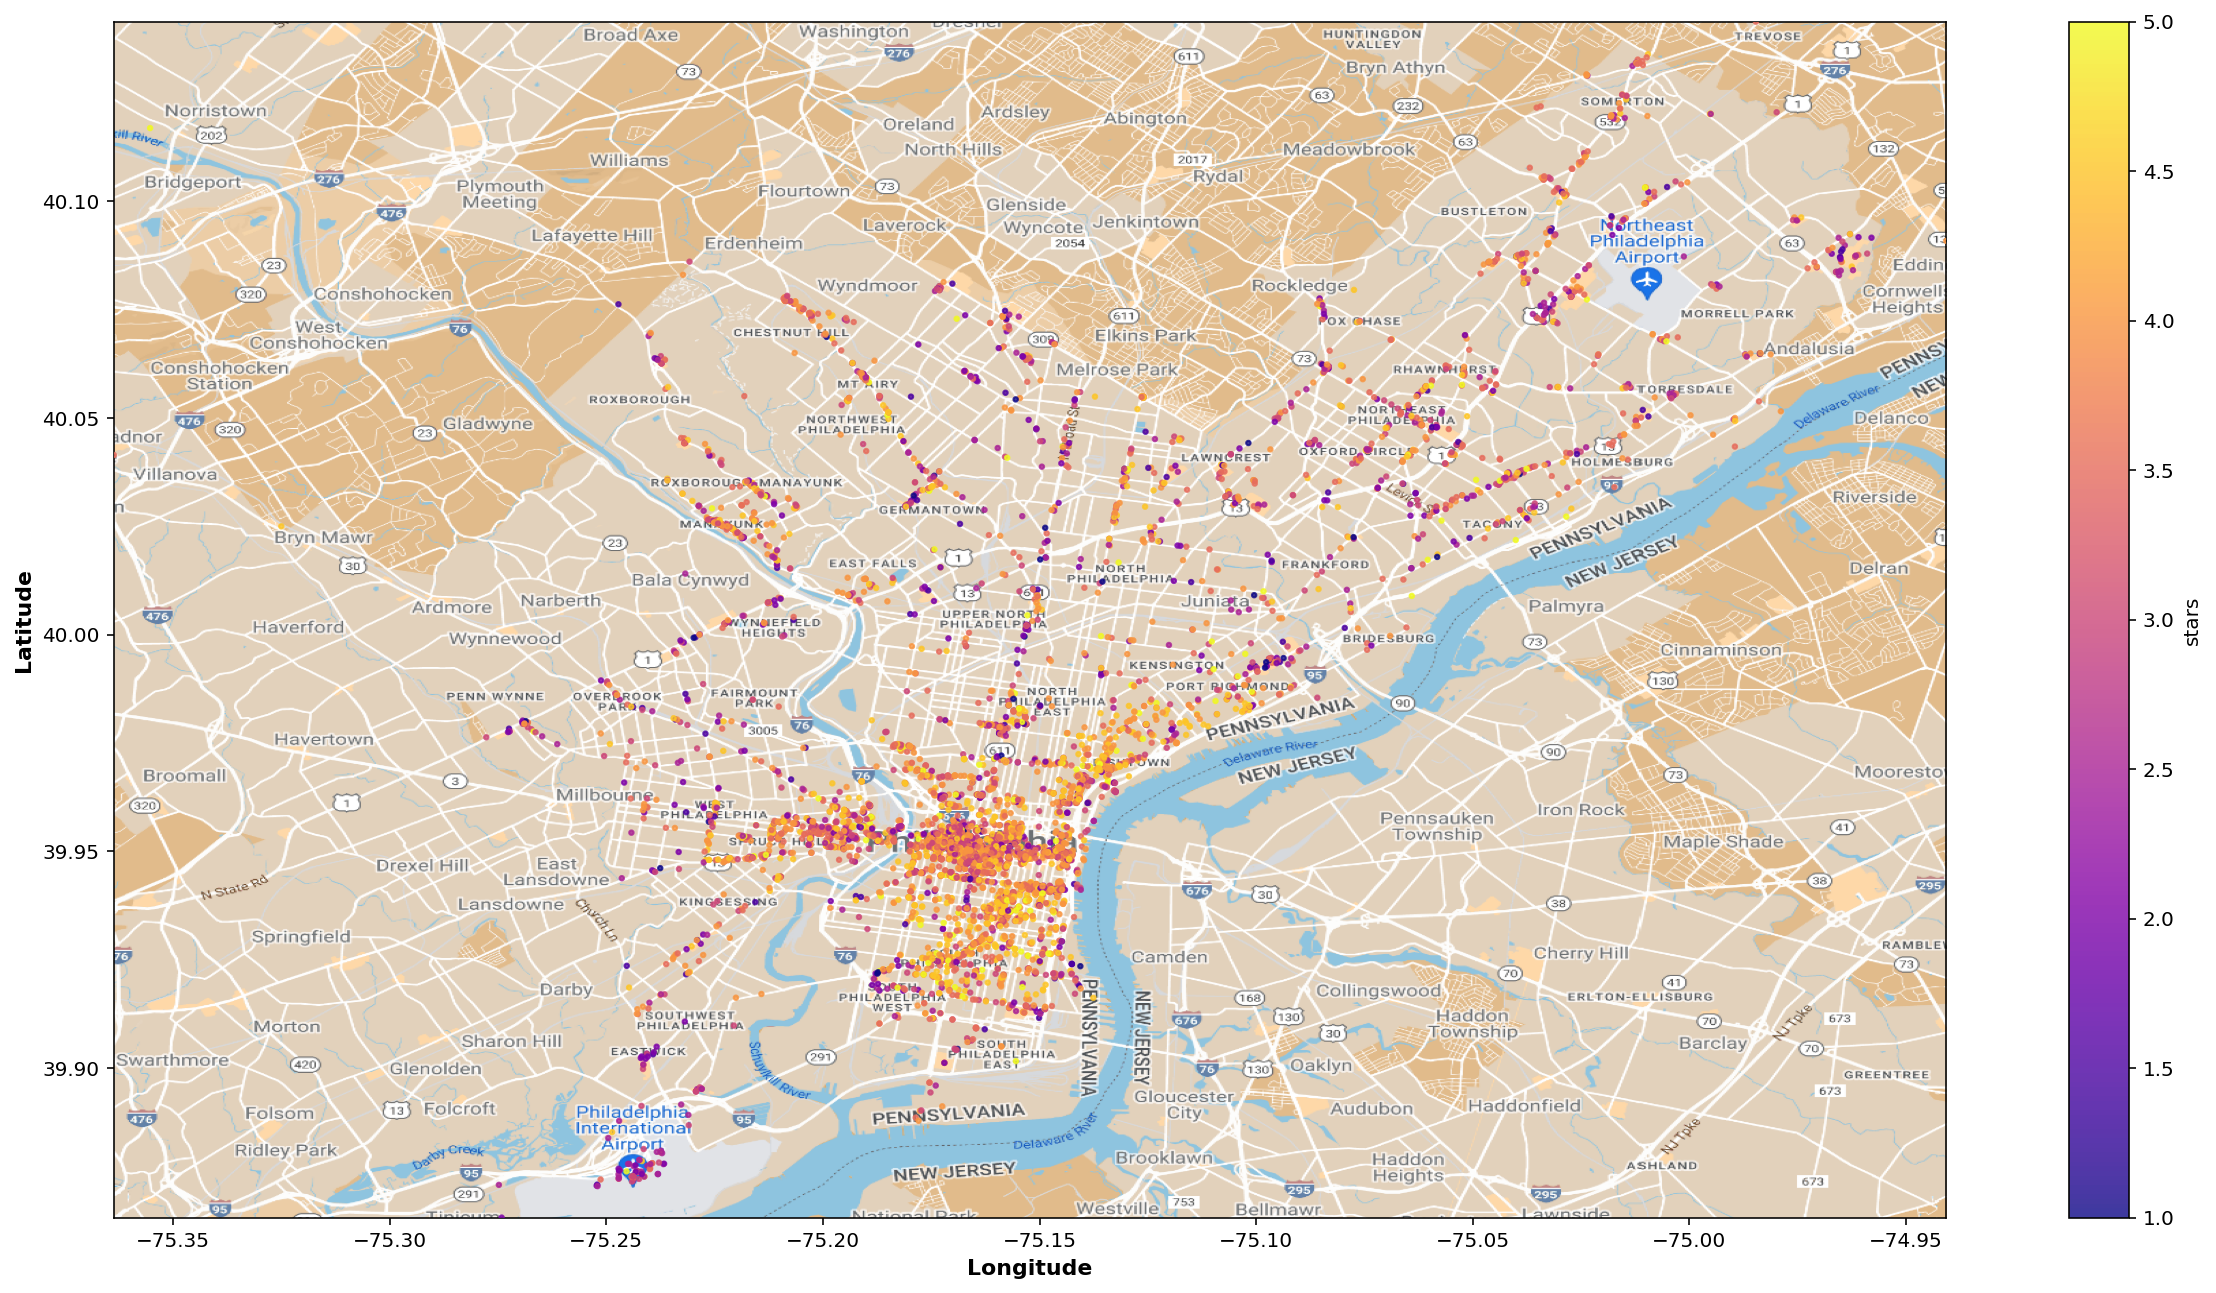

In [11]:
plt.figure(figsize=(22,11))
img=imread('PHmap.png')

plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
df.plot(x='longitude', y='latitude', kind='scatter', s = 5, alpha=0.8, c='stars', cmap="plasma", ax=plt.gca(), zorder=5)
plt.xlabel('Longitude', fontweight='bold', fontsize='11', horizontalalignment='center')
plt.ylabel('Latitude', fontweight='bold', fontsize='11', horizontalalignment='center')

Text(0, 0.5, 'Latitude')

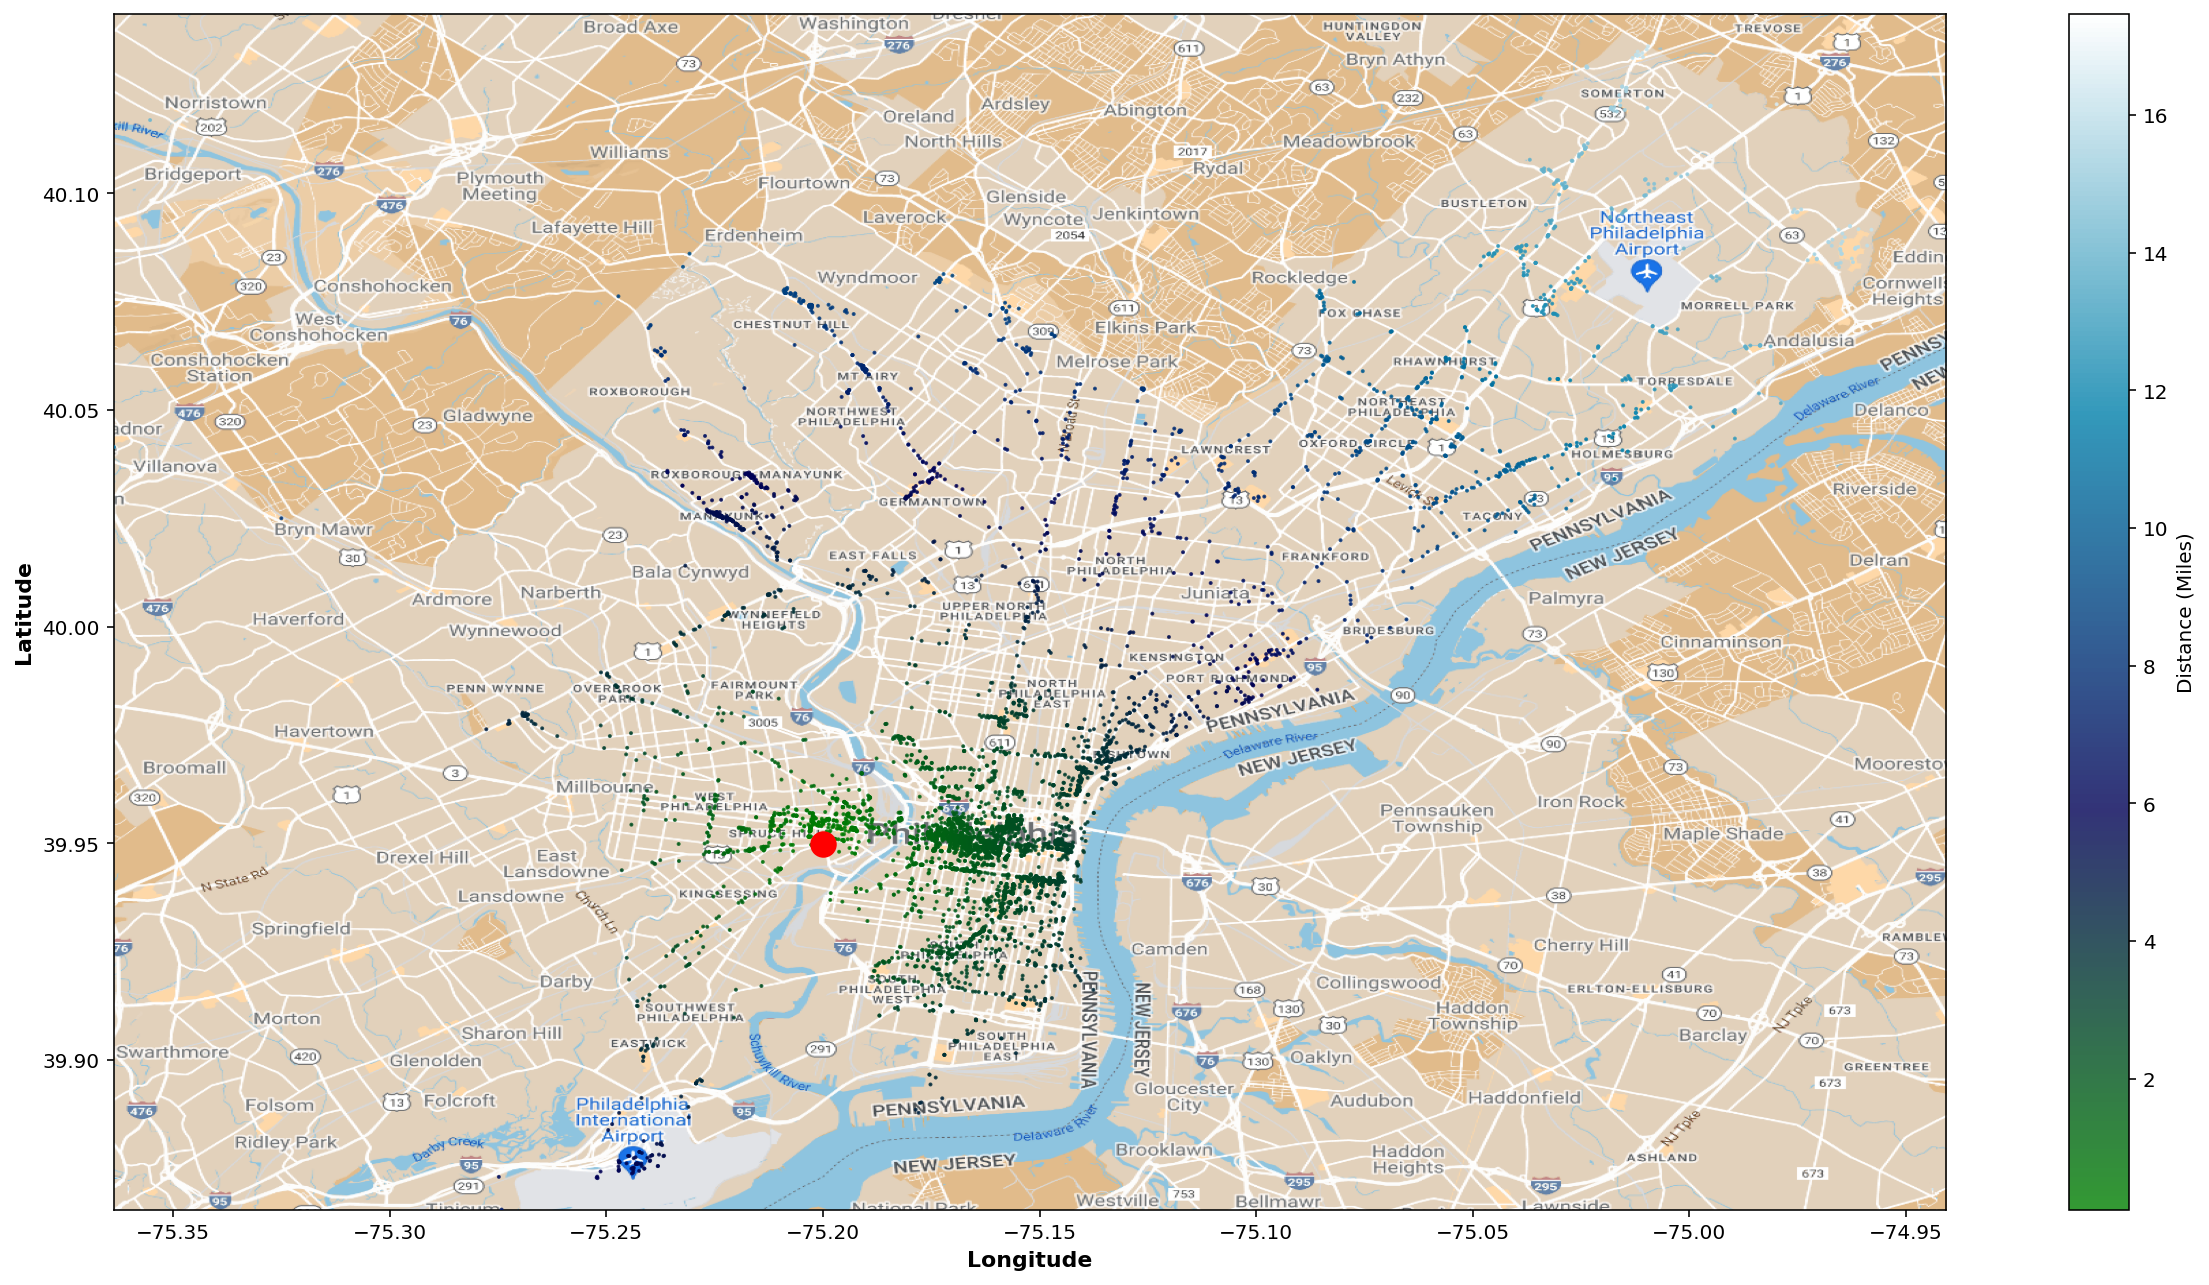

In [12]:
df_userplt = pd.DataFrame(data={'lat': [user_lat], 'long': [user_long]})

img=imread('PHmap.png')
plt.figure(figsize=(22,11))

plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
ax1 = df.plot(x='longitude', y='latitude', kind='scatter', s = 1, alpha=0.8, c='Distance (Miles)', cmap="ocean", ax=plt.gca(), zorder=5)
ax2 = df_userplt.plot(x = 'long', y = 'lat', kind='scatter', s = 150, c='red', ax=ax1, zorder=5)
plt.xlabel('Longitude', fontweight='bold', fontsize='11', horizontalalignment='center')
plt.ylabel('Latitude', fontweight='bold', fontsize='11', horizontalalignment='center')

# Data Modeling



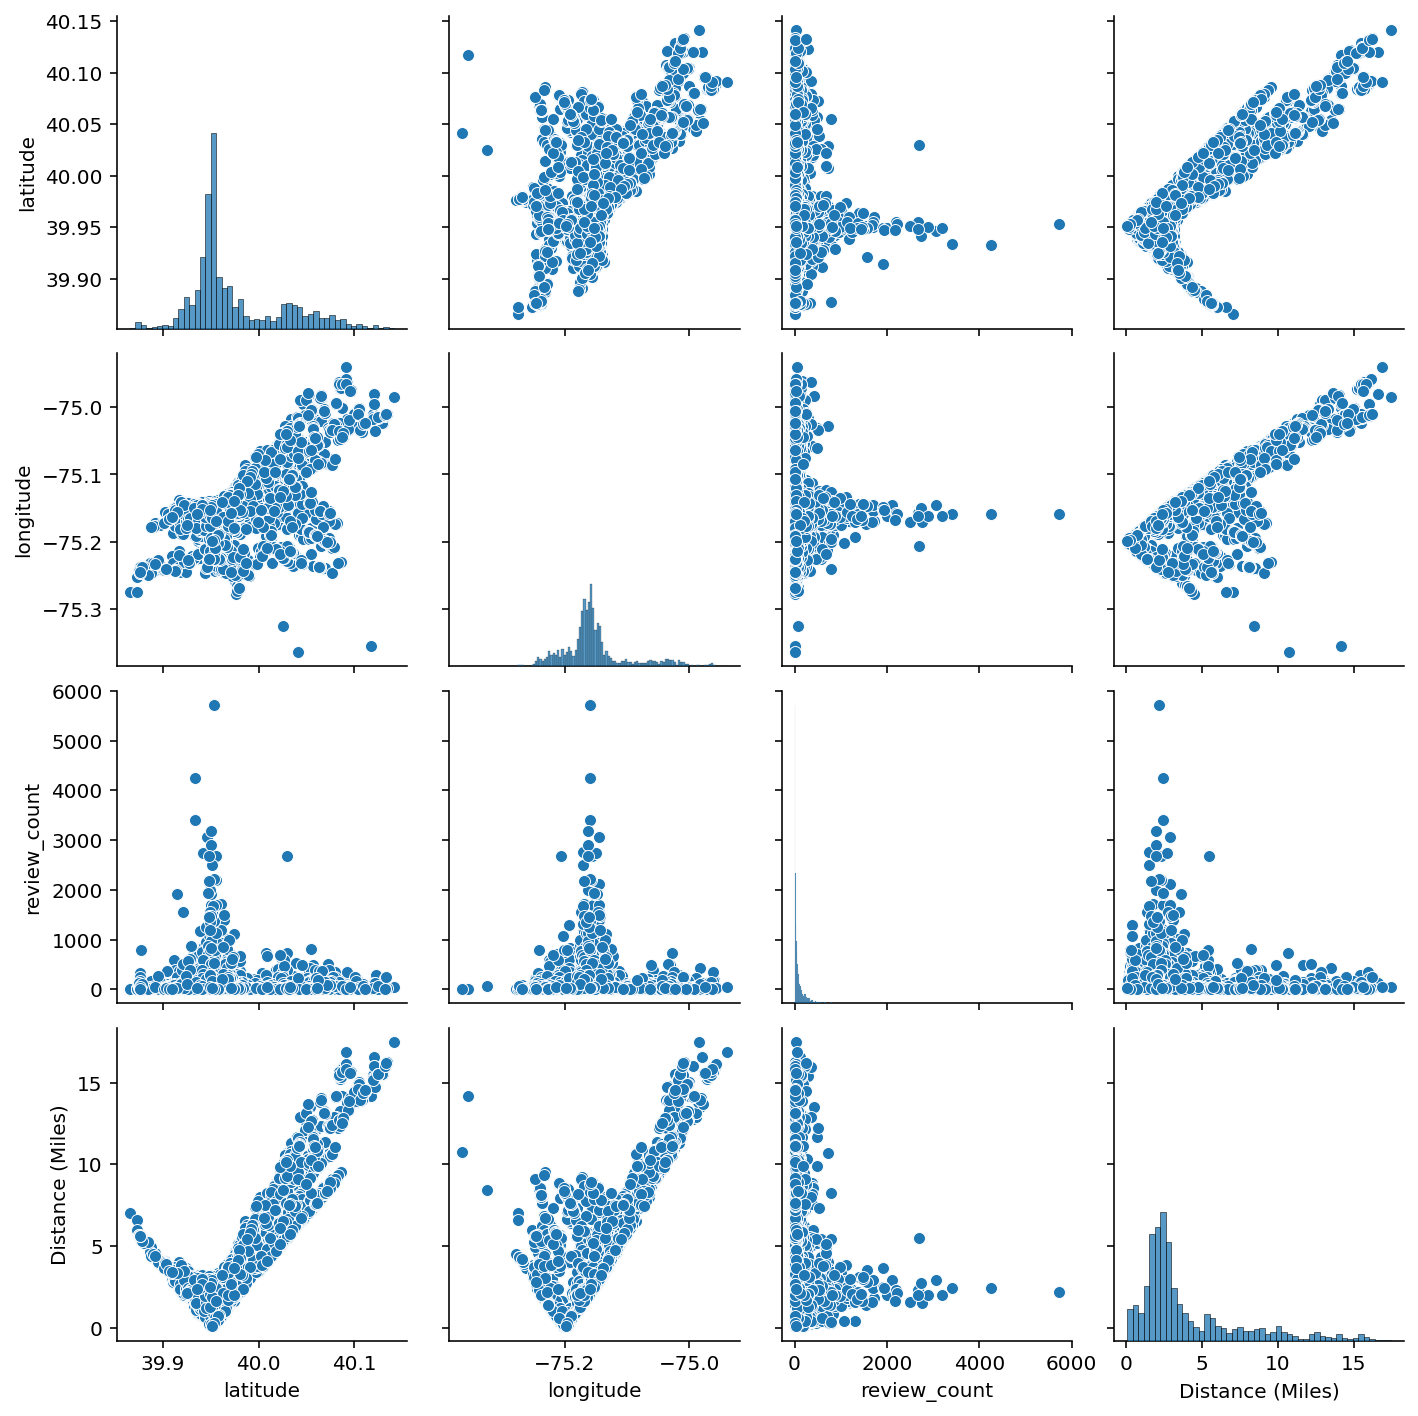

In [13]:
sns.pairplot(df.drop(["stars"], axis=1))

<AxesSubplot: >

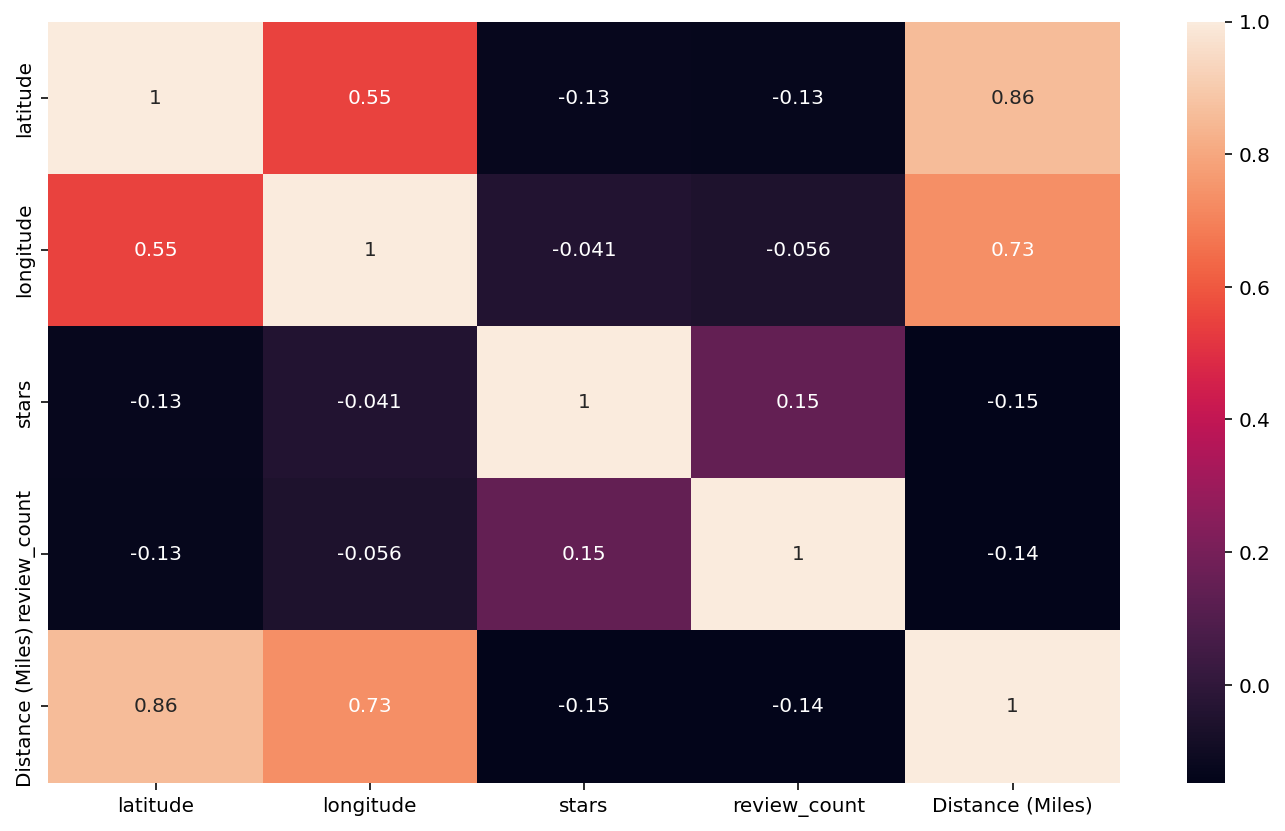

In [14]:
sns.heatmap(df.corr(), annot=True)

In [15]:
#stars_pca = {'1':1, '1.5':2, '2':3, '2.5':4, '3':5, '3.5':6, '4':7,'4.5':8, '5':9}
#df.replace({'stars': stars_pca}, inplace=True)

In [16]:
#Let's only use the basic stats as X data.
X = df[['Distance (Miles)', 'review_count', "stars"]]

In [17]:
#Create PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<AxesSubplot: xlabel='0', ylabel='1'>

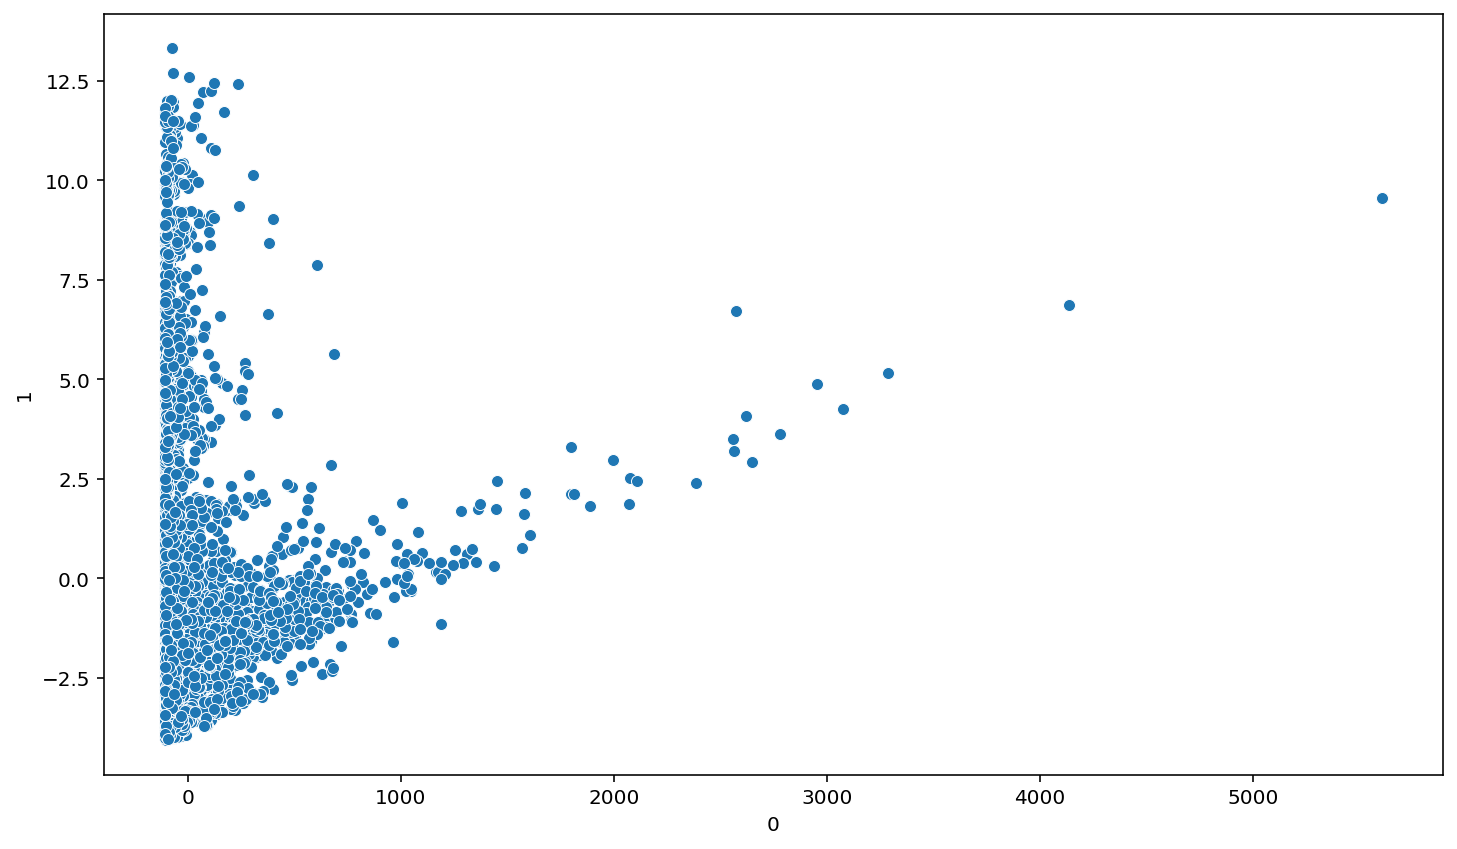

In [18]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])

<AxesSubplot: xlabel='0', ylabel='1'>

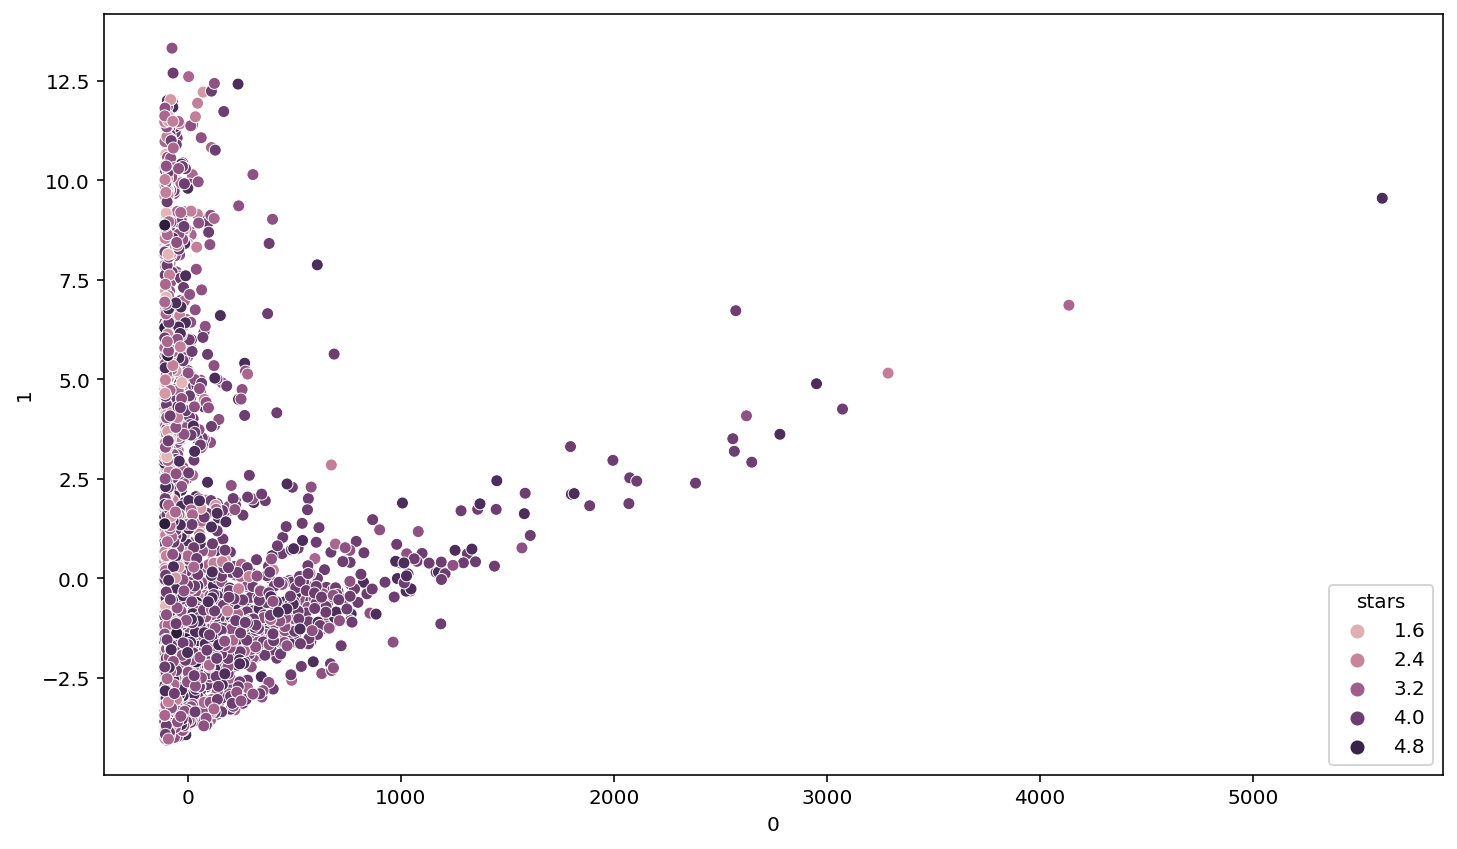

In [19]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df.stars)

In [20]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

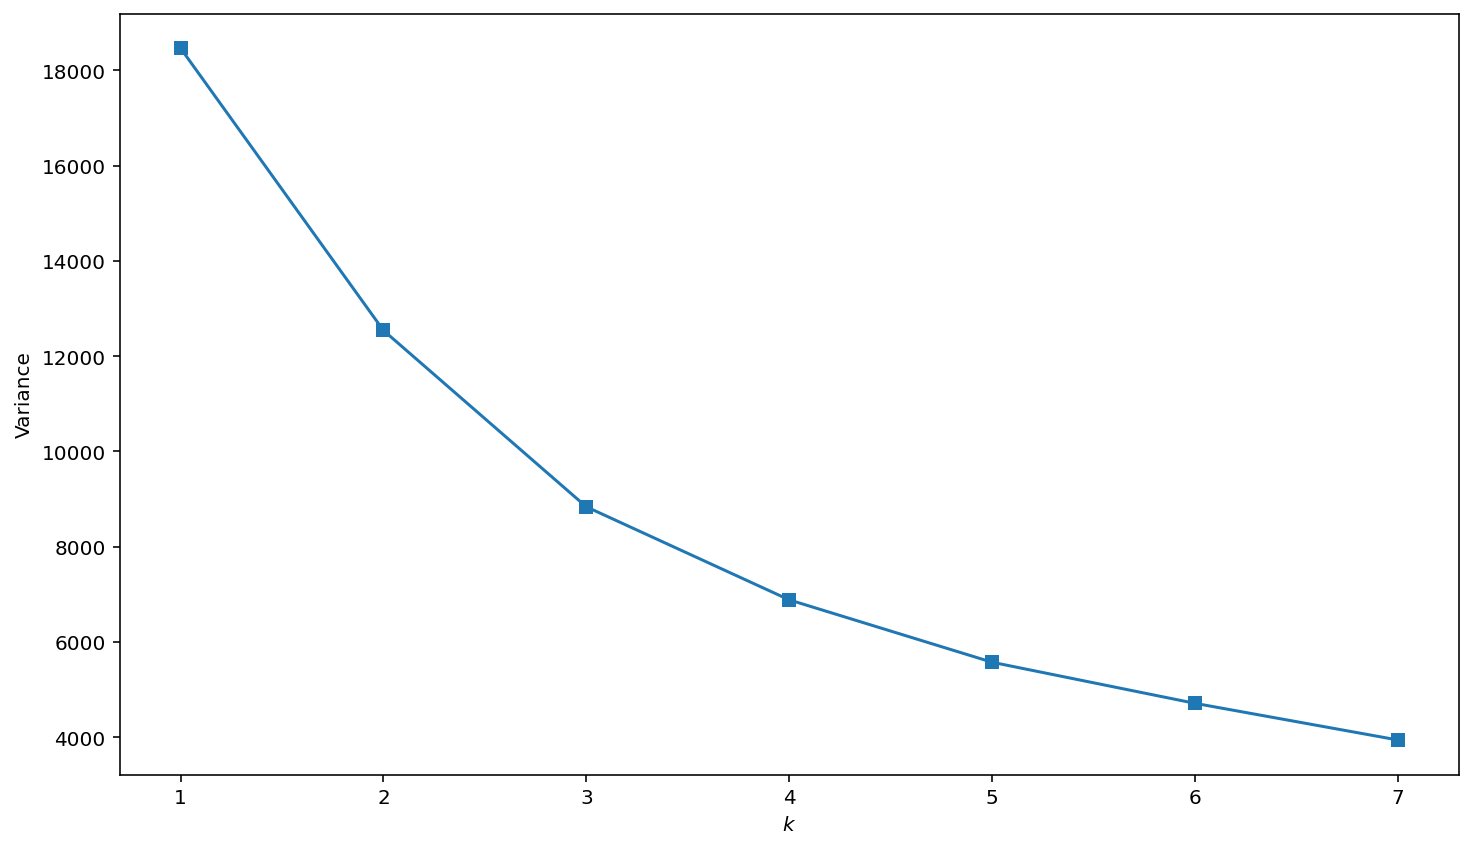

In [21]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [22]:
#create KMeans model
kmeans = KMeans(n_clusters=5, random_state=1).fit(X)
y = kmeans.fit_predict(X)

<AxesSubplot: xlabel='0', ylabel='1'>

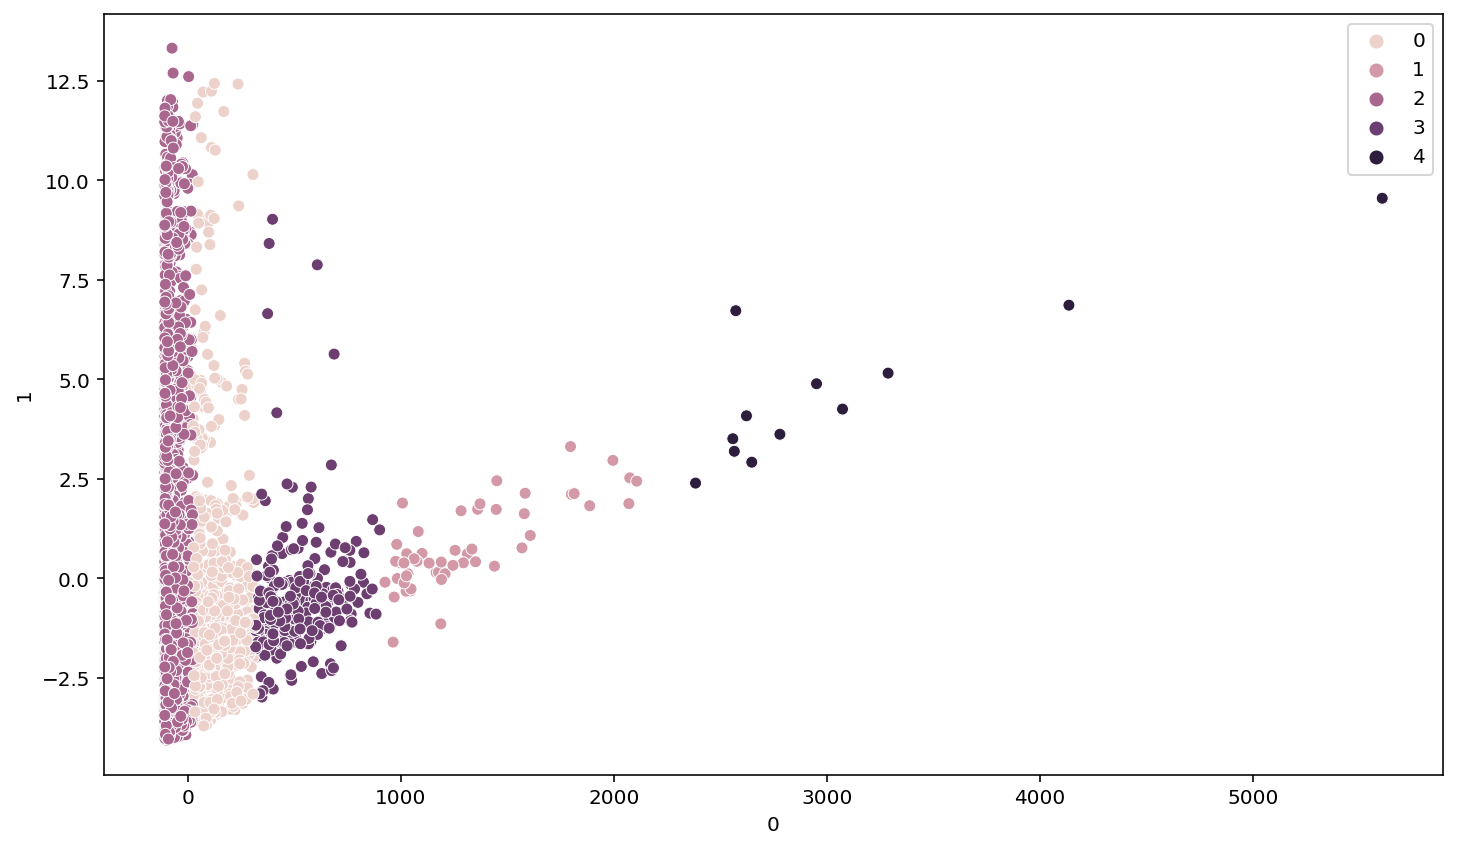

In [23]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

<AxesSubplot: xlabel='review_count', ylabel='Distance (Miles)'>

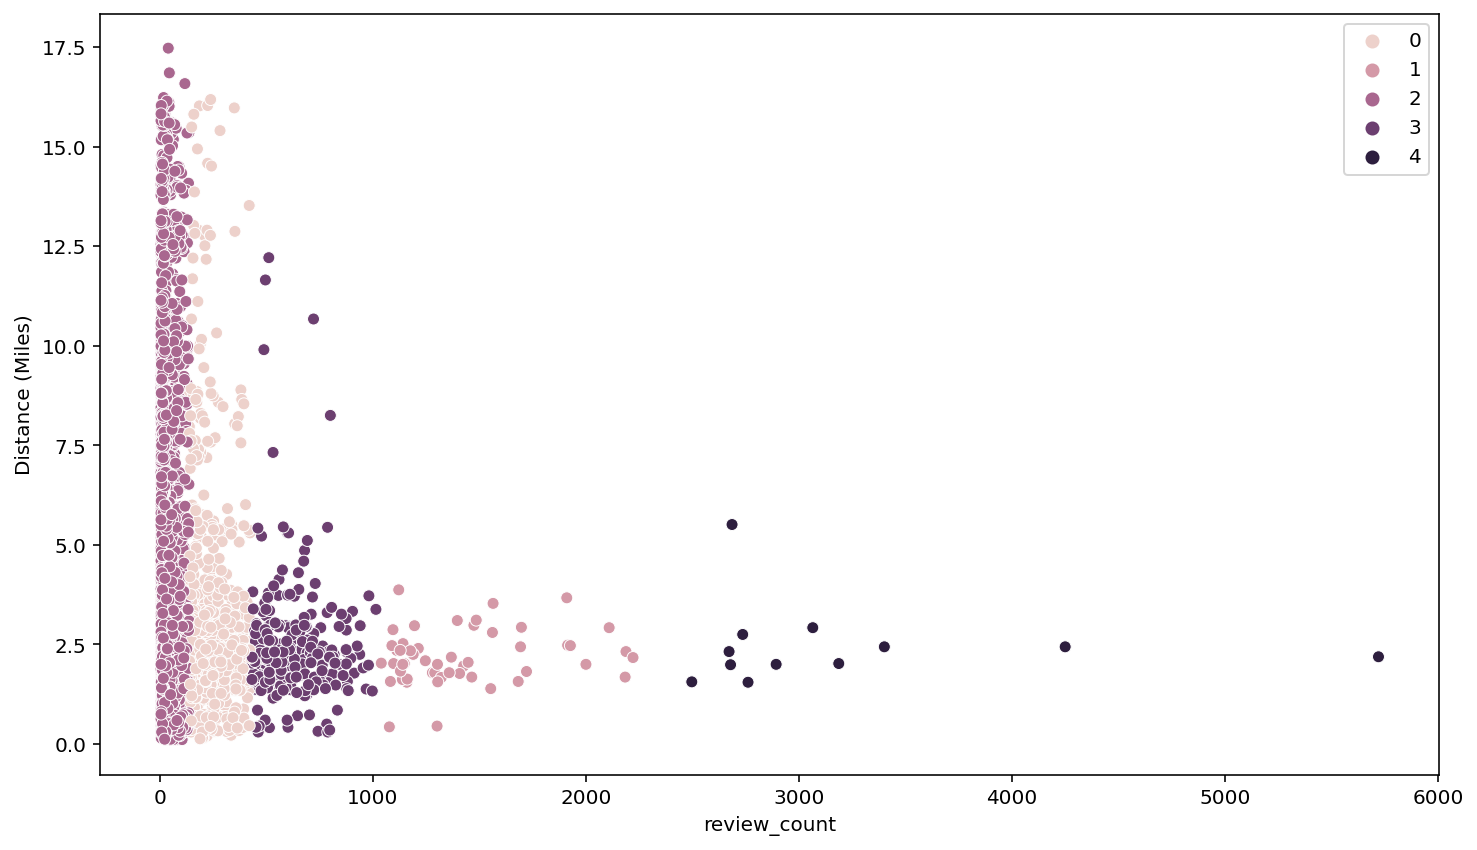

In [24]:
sns.scatterplot(x = df['review_count'], y = df['Distance (Miles)'], hue=y)

<AxesSubplot: xlabel='stars', ylabel='review_count'>

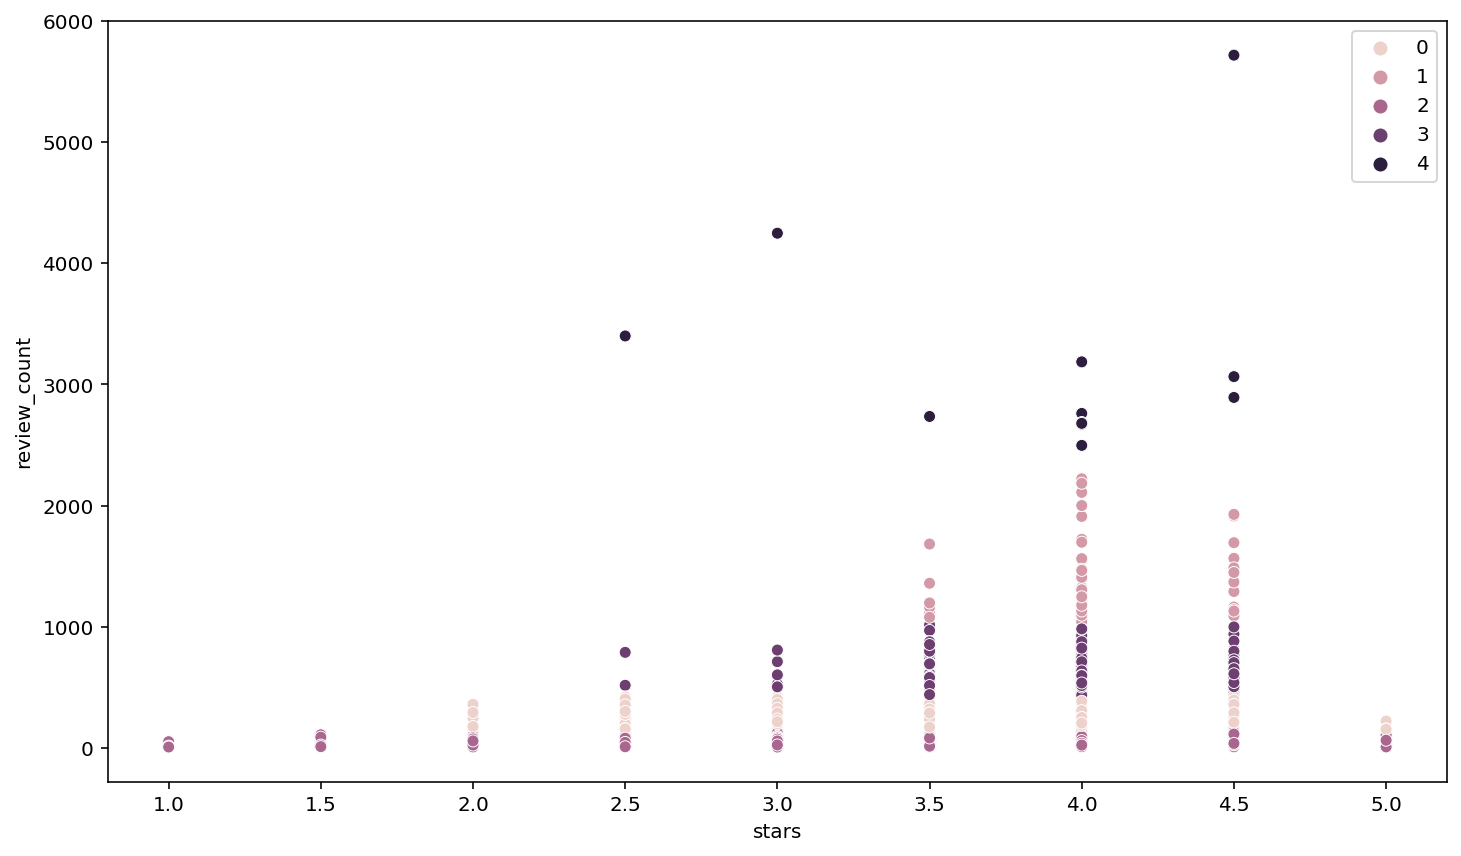

In [25]:
sns.scatterplot(x = df['stars'], y = df['review_count'], hue=y)

In [26]:
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([df, y_df], axis=1)

In [27]:
pca_df

0         1
0     -33.757931 -1.685102
1     131.240445 -0.720513
2      91.242769 -1.807448
3     -48.757838 -1.745534
4     -72.763813  0.986824
...          ...       ...
5847 -105.753565 -3.920140
5848  -92.768404  3.452342
5849  -58.765153  1.664896
5850  -91.753717 -4.039091
5851  -78.757592 -1.792712

[5852 rows x 2 columns]

In [28]:
fig = px.scatter(pd.concat([new_df, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster', hover_data=['Distance (Miles)','review_count','stars'])
fig.show()

# Evaluation



In [29]:
new_df.sort_values(by='Cluster', ascending=False, inplace = True)
results_df_test = new_df.drop(columns = ['latitude', 'longitude', 'categories', 'Cluster'])
results_df_test[:10]

name  stars  review_count  Distance (Miles)
2529                 Barbuzzo    4.5          2893              2.00
5548  Reading Terminal Market    4.5          5721              2.19
1262                    Zahav    4.5          3065              2.92
4434     Pat's King of Steaks    3.0          4250              2.44
5807          Green Eggs Café    4.0          2679              1.99
3794            The Dandelion    4.0          2497              1.56
5111                   El Vez    4.0          3187              2.02
2080           Dim Sum Garden    4.0          2672              2.32
2096           Jim's South St    3.5          2736              2.75
819                      Parc    4.0          2761              1.55

In [30]:
regression_df = df.drop(columns = ['name', 'latitude', 'longitude', 'categories'])
regression_df.head(10)

stars  review_count  Distance (Miles)
0    4.0            80              2.39
1    4.0           245              3.02
2    4.5           205              2.03
3    4.0            65              2.36
4    3.0            41              5.11
5    3.5            65              3.52
6    3.0            56              0.42
7    3.0           137              1.92
8    4.5            72              2.26
9    1.5            15              6.23

In [31]:
X = regression_df.drop(columns = ['stars']) # note: only drop target
y = regression_df['stars']
regression_df.dtypes

stars               float64
review_count          int64
Distance (Miles)    float64
dtype: object

In [32]:
## split our data
from sklearn.model_selection import train_test_split

scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(scaled,columns = X.columns)
X_scaled.head()

review_count  Distance (Miles)
0     -0.139881         -0.475153
1      0.543751         -0.288409
2      0.378022         -0.581864
3     -0.202030         -0.484046
4     -0.301467          0.331107

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 6 )
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4389, 2), (4389,), (1463, 2), (1463,))

In [34]:
lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [35]:
X2 = sma.add_constant(X_train)
est = sma.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     90.44
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           3.25e-39
Time:                        04:08:21   Log-Likelihood:                -5187.9
No. Observations:                4389   AIC:                         1.038e+04
Df Residuals:                    4386   BIC:                         1.040e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.6446      0.020  